In [82]:
from Bio.Seq import Seq

For given DNA sequences:
Sequence X is obtained from FASTA file (x.fasta)
Sequence Y is obtained from FASTA file (y.fasta)

In [83]:
from Bio import SeqIO

In [84]:
#read

readSeqX = SeqIO.read('Latsol/x.fasta','fasta')
SeqX = Seq(readSeqX.seq)
readSeqY = SeqIO.read('Latsol/y.fasta','fasta')
SeqY = Seq(readSeqY.seq)

In [85]:
def clean_Sequence(seq):
    for letter in "BDEFHIJKLMNOPQRSUVWXYZ":
        seq = seq.replace(letter,"")
    return seq

In [86]:
#parse 

# SeqX_iterator = SeqIO.parse('Latsol/x.fasta','fasta')
# for SeqX in SeqX_iterator:
#     SeqX.seq = Seq(clean_Sequence(str(SeqX.seq)))
# SeqY_iterator = SeqIO.parse('Latsol/y.fasta','fasta')
# for SeqY in SeqY_iterator:
#     SeqY.seq = Seq(clean_Sequence(str(SeqY.seq)))

In [87]:
print(len(SeqX))
print(len(SeqY))

1883
1050


The sequences might be contain ambiguous letters. Use seq = seq.replace(“<letter>”, “”) function to
remove the unwanted letter from the sequence.

<small>The ambiguous letters can be any character so filter the sequence after reading it from fasta file is a must.<small>

In [88]:
def clean_Sequence(seq):
    for letter in "BDEFHIJKLMNOPQRSUVWXYZ":
        seq = seq.replace(letter,"")
    return seq

In [89]:
#for read

# SeqX = clean_Sequence(SeqX)
# SeqY = clean_Sequence(SeqY)

In [90]:
#print(str(SeqX))

# 1. Sequence Manipulation:
* Display the total length of Sequence X and Y

In [91]:
print(len(SeqX))
print(len(SeqY))

1883
1050


* Display which index the first time the codon (CGC) appears in Sequence X and Y.

In [92]:
print(SeqX.count("CGC"))
print(SeqY.count("CGC"))

31
24


## Create a new sequence using the following task below:
+ Display which index the first time the codon (CGC) appears in Sequence X and Y.

In [93]:
print(SeqX.find("CGC"))
print(SeqY.find("CGC"))

51
39


- Create a new sequence using the following task below:
    - Take the first 10 nucleotides from Sequence X and the last 5 nucleotides from Sequence X.
    - o Take the first 20 nucleotides from Sequence Y and the last 3 nucleotides from Sequence Y.
    - Combine both of the string above and reverse it to a new sequence, Sequence Z.

In [96]:
#no1 
Seq1 = SeqX[:10]+SeqY[-5:]
print(Seq1)
#no2
Seq2 = SeqX[:20]+SeqY[-3:]
print(Seq2)

#no3
SeqZ = Seq1+Seq2
SeqZ = SeqZ[::-1]
print(SeqZ)

ATGGTGTTGGTCGAC
ATGGTGTTGGATCTGGACTTGAC
CAGTTCAGGTCTAGGTTGTGGTACAGCTGGTTGTGGTA


# 2. Sequence Analysis & Plotting
* Display the nucleotides base (A and C) frequency for Sequence C with a chart using matplotlib
library. You are free to plot using bar or pie chart.

In [101]:
import matplotlib.pyplot as plt

Counter({'G': 14, 'T': 13, 'A': 6, 'C': 5})
['A', 'C']
[6, 5]


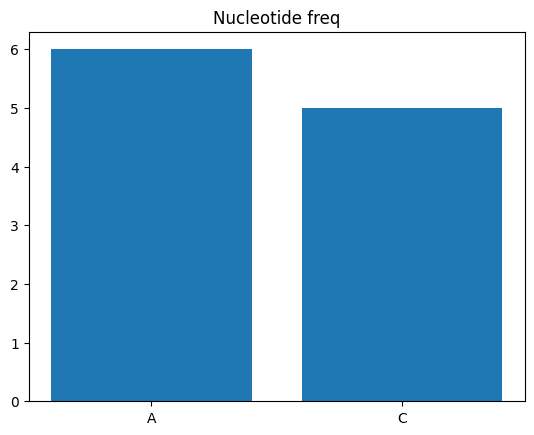

In [104]:
from collections import Counter
freqZ = Counter(SeqZ)
print(freqZ)

freqKey = ['A', 'C']
freqVal = [freqZ[key] for key in freqKey]

print(freqKey)
print(freqVal)

import matplotlib.pyplot as plt
plt.bar(freqKey,freqVal)
plt.title("Nucleotide freq")
plt.show()


+ Display GC and AT content percentage for Sequence C.

In [107]:
from Bio.SeqUtils import GC123
GCSeqZ = GC123(SeqZ)[0]
ATSeqZ = 100- GCSeqZ
print(GCSeqZ)
print(ATSeqZ)


50.0
50.0


+ Display melting temperature for Sequence C using Wallace method.

In [108]:
from Bio.SeqUtils import MeltingTemp as mt

print('%0.2f' % mt.Tm_Wallace(SeqZ))

114.00


+ Display molecular weight for Sequence C.

In [109]:
from Bio.SeqUtils import molecular_weight as mw

print('%0.2f' % mw(SeqZ))

11906.56


# 3. DNA and mRNA Protein Synthesis:
+ Transcribe and display the DNA sequence C into mRNA Sequence.

In [110]:
mRNAseqZ = SeqZ.transcribe()
print(mRNAseqZ)

CAGUUCAGGUCUAGGUUGUGGUACAGCUGGUUGUGGUA


+ Translate and display the mRNA sequence C into amino acids Sequence.

In [111]:
aminoAcidSeqZ = mRNAseqZ.translate()
print(aminoAcidSeqZ)

QFRSRLWYSWLW


c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# 4. Sequence Alginment & Similarities:
+ Perform local alignment pairwise between sequence A and sequence B and display the alignment
score.

In [113]:
from Bio import pairwise2

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [115]:
Local_alignments = pairwise2.align.localms(SeqX,SeqY,2,-1,-0.6,-0.2)

for alignment in Local_alignments:
    print(alignment)

Alignment(seqA='ATGGTGT---TGGATCTGGACTTGTTTCGGACGGATAAAGGAG-GAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGG-TGAAGGC-GGACGGCGAGTGG--CGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATG--CAGCAAG-ACAATTGGAGAGAAAAT-GAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAA--G---TGTCACAGATCAAAAAACTCCGACTCC---TCATCGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTT-GA-GAACCTC-CG----CGAGNNNNNNNNNNNNNNNNNNC-T-GCATCCCTCGGTGC---CC--ATCAGTAACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACT-CGC---ACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCG--AGGGTACTTCCTGAAGG-GGC-CCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGGTGGCACAGCTC-AGCCAGTTTGATGAAGAGCTTTACAAG-GTGATTGGCAAAG-GCAGTGAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCA-GCCC--ATCGC-TGCTCTCCACCGAGATG-AGTG-GCTACGGC---CAGAGGATTTGCCCATCAAGTATGCTG-GCCTGTCCACCTGCTTT-CGCCAGGAGGT

In [116]:
Global_alignments =  pairwise2.align.globalxx(SeqX,SeqY)
for alignment in Global_alignments:
    print(alignment)

Alignment(seqA='ATGGTGTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--GNNNNNNNNNNNNNNNNNN-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCT

+ Find and display the Hamming and Levenshtein distance between Sequence A and B

In [117]:
def hamming(dnaA,dnaB):
    h = [] #store mismatch
    for x,y in zip(dnaA,dnaB):
      if (x!=y):
          h.append((x,y))
    return len(h)

print(hamming(SeqX,SeqY))

758


In [118]:
from Levenshtein import distance

print(distance(SeqX,SeqY))

1045
